<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


You will need the following libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>1.0 Importing the Data</b>


Load the csv:


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [4]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:


In [19]:
servings = df[["wine_servings"]]
servings = servings.groupby(df["continent"]).count()
servings

,wine_servings
continent,
Africa,53
Asia,44
Europe,45
North America,23
Oceania,16
South America,12


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [20]:
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


In [23]:
df.count()

country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       193
dtype: int64

In [29]:
Q1 = df.quantile(0.25)
Q1

beer_servings                   20.0
spirit_servings                  4.0
wine_servings                    1.0
total_litres_of_pure_alcohol     1.3
Name: 0.25, dtype: float64

In [30]:
Q2 = df.quantile(0.50)
Q2

beer_servings                   76.0
spirit_servings                 56.0
wine_servings                    8.0
total_litres_of_pure_alcohol     4.2
Name: 0.5, dtype: float64

In [31]:
Q3 = df.quantile(0.75)
Q3

beer_servings                   188.0
spirit_servings                 128.0
wine_servings                    59.0
total_litres_of_pure_alcohol      7.2
Name: 0.75, dtype: float64

In [32]:
IQR = Q3 - Q1
IQR

beer_servings                   168.0
spirit_servings                 124.0
wine_servings                    58.0
total_litres_of_pure_alcohol      5.9
dtype: float64

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


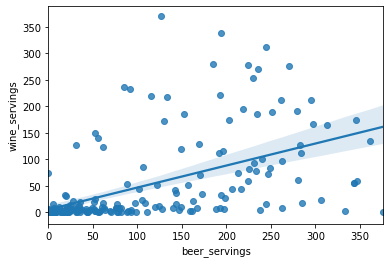

In [51]:
import seaborn as sns 
sns.regplot(x = "beer_servings", y = "wine_servings", data = df)

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [55]:
x = df[["wine_servings"]]
y = df["total_litres_of_pure_alcohol"]
lr.fit(x, y)
lr.score(x, y)

0.44568754597876037

In [57]:
yhat = lr.predict(x)
yhat

array([ 3.15407943,  4.86088833,  3.59658545, 13.01564196,  4.57642018,
        4.57642018, 10.13935289,  3.50176273,  9.85488474,  9.19112573,
        3.3121173 ,  4.76606562,  3.37533244,  3.15407943,  4.29195203,
        4.48159747,  9.85488474,  3.40694001,  3.56497787,  3.15407943,
        3.40694001,  3.40694001,  4.26034446,  3.65980059,  3.18568701,
        6.12519122,  3.37533244,  3.15407943,  3.37533244,  3.65980059,
        3.18568701,  3.28050972,  6.31483665,  3.18568701,  3.18568701,
        8.59058185,  3.40694001,  3.24890215,  3.18568701,  3.43854758,
        5.49303978,  3.50176273, 11.18240277,  3.3121173 ,  6.72573509,
        7.38949411,  3.15407943,  3.18568701, 11.94098451,  3.24890215,
        3.97587631,  3.43854758,  3.24890215,  3.18568701,  3.21729458,
       10.51864376,  3.15407943,  5.01892619,  3.15407943,  3.18568701,
        6.22001394, 14.84888115,  5.01892619,  3.18568701,  7.86360769,
        8.68540457,  3.47015516, 10.04453017,  4.03909146,  3.21

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> in the following questions.


### Question 7

Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


In [59]:
from sklearn.linear_model import LinearRegression

In [65]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [69]:
x = df[["beer_servings", "spirit_servings", "wine_servings"]]
y = df["total_litres_of_pure_alcohol"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

lr.fit(x, y)
lr.score(x, y)
yhat = lr.predict(x)
yhat[0:4]

array([ 0.72244985,  5.26936613,  1.40409598, 12.34732018])

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model", LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x, y)
yhat = pipe.predict(x)
yhat

array([ 0.66771682,  5.02238617,  1.58272774, 12.65988765,  6.66269696,
        5.11417808,  8.38960627,  3.24877068, 10.04092614, 10.00906016,
        1.57698248,  6.40168165,  2.31737194,  0.66771682,  6.48283422,
       11.42460663, 10.66863692,  7.11928981,  1.84668475,  1.3635188 ,
        5.13387195,  4.49234674,  5.60809477,  7.35851023,  1.61418892,
       10.73046794,  1.52497228,  3.14107218,  1.85380704,  4.86359651,
        2.64920105,  4.56436045,  8.57163956,  1.20247755,  1.1397    ,
        7.83100004,  4.87720416,  5.0955256 ,  0.71928084,  2.94348623,
        5.56772725,  5.10890305, 10.42795493,  4.32101529,  8.54348687,
       11.19112307,  0.66771682,  1.64584997, 10.57901794,  1.36209903,
        6.66141461,  6.48582159,  5.14023274,  0.87620627,  2.56140873,
        5.87202967,  1.21522881,  8.6636246 ,  1.283123  ,  2.98743956,
        8.97792868, 11.64483833,  8.72825583,  0.92504628,  5.11422565,
       11.03912521,  1.72175103,  8.41537865, 14.03646297,  2.58

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [75]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x, y)
RidgeModel.score(x, y)
yhat = RidgeModel.predict(x)
yhat

array([ 0.72244998,  5.26936609,  1.40409609, 12.34731984,  6.30123152,
        5.3010243 ,  8.18102246,  4.0677754 , 10.01280591, 10.05282284,
        1.90251167,  6.50990459,  2.58337165,  0.72244998,  6.60751283,
        9.79686888, 10.82180261,  7.43778571,  1.61504963,  1.14341698,
        4.54496199,  4.93307109,  4.99357197,  7.71867742,  1.3369618 ,
       10.37556566,  1.40096641,  2.33310633,  1.52725254,  4.48540893,
        2.79300022,  3.49255728,  8.61376538,  1.08072101,  1.02855705,
        7.78393809,  5.28358445,  4.86304734,  0.80343254,  2.27307662,
        5.85860433,  4.9791996 , 10.35100752,  4.63611195,  8.441154  ,
       12.11938644,  0.72244998,  1.37082285, 10.53196684,  1.72956744,
        6.53996497,  6.68600557,  4.8868398 ,  0.91050525,  2.77972344,
        6.1355376 ,  1.05190242,  8.78489008,  1.13518266,  2.69231435,
        9.15785619, 11.31813548,  9.54256716,  0.88487852,  5.61479517,
       11.67647605,  1.49656705,  8.38838996, 11.62734061,  2.79

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


In [76]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

pr = PolynomialFeatures(degree = 2)
x_train_pf = pr.fit_transform(x_train)
x_test_pf = pr.fit_transform(x_test)

from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pf, y_train)
yhat = RidgeModel.predict(x_test_pf)
print("Predicted:", yhat[0:4])
print("test set:", y_test[0:4].values)

Predicted: [0.67484044 4.41230278 8.54359723 0.78459143]
test set: [0.  4.6 8.2 0.1]


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.
